In [1]:
# import python libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import matplotlib.patheffects as PathEffects

In [2]:
# load daily close price data
df = pd.read_csv('../../github-bitcoin-scripts/bitcoin-data/bitcoin-daily-data.csv')
orig_dates = df['date'].to_list()
orig_prices = df['price'].to_list()
df.tail(5)

,date,price
4810,3/6/22,37814.23
4811,3/7/22,38842.99
4812,3/8/22,42313.62
4813,3/9/22,39249.76
4814,3/10/22,39865.31


In [14]:
hodl_days = [l+1 for l in list(range(1461))]

for d in hodl_days:
    hodl_return = []
    for i in range(len(orig_dates)):
        date = orig_dates[i]
        price = orig_prices[i]
        if price > 0:
            try:
                hodl_return.append((orig_prices[i+d]-price)/price*100)
            except:
                hodl_return.append(-100)
        else:
            hodl_return.append(0)
    df['%i_day_return' % d] = hodl_return

<ipython-input-14-684298b5fed3>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['%i_day_return' % d] = hodl_return


In [4]:
def str_to_datetime(strs):
    """Convert a list of "YYYY-MM-DD" strings to datetime objects."""
    dates = []
    for date in strs:
        if '-' in date:
            y, m, d = (int(x) for x in date.split("-"))
        elif '/' in date:
            m, d, y = int(date.split('/')[0]), int(date.split('/')[1]), \
            int(date.split('/')[2])+2000
        date = datetime.datetime(y, m, d)
        dates.append(date)
    return dates

datetimes = str_to_datetime(orig_dates)
dates = [mdates.date2num(date) for date in datetimes]

In [5]:
def x_axis_dates(ax=None, fig=None):
    """Helper function to format the x axis as dates.

    Input:
    ax:  An Axes instance or an iterable of Axes instances.
    Optional, defaults to plt.gca()
    fig: The Figure instance containing those Axes or Axeses
    Optional, defaults to plt.gcf()
    """
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()

In [6]:
df.sample(10)

,date,price,1_day_return,2_day_return,3_day_return,4_day_return,5_day_return,6_day_return,7_day_return,8_day_return,...,356_day_return,357_day_return,358_day_return,359_day_return,360_day_return,361_day_return,362_day_return,363_day_return,364_day_return,365_day_return
3100,6/30/17,2499.983800,-1.591362,1.192008,3.243321,5.003532,5.171582,4.765179,0.850106,3.198021,...,168.689841,142.157421,146.823999,146.009146,149.900319,142.998275,145.304090,133.932068,148.157660,155.493908
2419,8/19/15,225.394400,4.122951,2.904331,1.929950,0.973671,-7.214997,-1.633847,-0.006478,-0.502852,...,159.438034,163.046686,160.221638,160.000382,159.581116,153.530611,151.648887,155.662430,153.664244,154.000321
1564,4/16/13,68.355700,36.155434,59.474630,73.328632,85.230347,74.381946,86.378020,109.894713,125.584699,...,552.790477,558.999615,543.981848,427.886775,514.515395,515.398570,507.044475,569.488865,660.906991,674.130760
2080,9/14/14,474.715000,-0.707035,-2.312166,-4.171071,-11.218436,-17.435956,-14.301254,-16.462088,-15.973711,...,-50.564634,-49.561674,-49.439095,-48.696102,-49.803229,-49.740455,-49.425698,-50.534847,-51.480783,-51.499194
2427,8/27/15,224.261000,2.997177,2.450359,1.938723,2.566786,1.376031,2.048551,1.116556,2.597019,...,154.946246,155.284022,155.801856,158.940476,158.934902,160.737489,159.198568,157.733177,156.724888,157.805102
514,6/1/10,0.004485,0.000000,0.000000,0.000000,0.000000,0.000000,0.735786,0.735786,1.739130,...,159318.060201,165340.356745,187184.280936,196064.994426,189425.083612,184963.545151,187857.636566,196109.587514,194794.091416,213277.926421
3213,10/21/17,6013.228800,-0.470172,-1.961176,-8.221520,-4.645175,-2.080144,-4.083477,-4.663115,2.117041,...,3.300057,3.563497,3.475441,8.317578,8.616564,8.338490,7.276560,6.745522,7.354721,7.327032
1057,11/26/11,2.470000,0.400810,3.238866,11.344130,20.246964,23.886640,26.117409,13.117409,14.497976,...,375.663968,377.283401,371.720648,377.728745,375.012146,376.518219,402.910931,399.797571,402.489879,405.348178
869,5/22/11,6.690100,6.872842,10.910151,25.554177,31.507750,27.056397,24.065410,26.005590,31.537645,...,-26.066875,-26.309024,-25.174512,-24.739541,-23.936862,-23.770945,-23.498901,-23.775429,-23.917430,-23.770945
2866,11/8/16,709.152500,1.697632,0.636675,1.044035,-0.790549,-0.937556,-0.388844,0.395373,4.641808,...,763.255788,809.207469,851.864726,891.324504,909.860545,941.665763,941.024152,881.200983,903.846324,951.789989


In [56]:
def hodl_analysis(hodl_days=365):
    start_date = list(orig_dates).index('10/5/09')
    end_date = len(orig_dates)-1
    analysis_start_date = list(orig_dates).index('10/5/09')
    analysis_end_date = len(orig_dates)-hodl_days
    n = 0
    sep_n = 2.
    res = (1920, 1200)
    size = res[0]/96.
    size_y = res[1]/96.

    ymin = min(orig_prices[start_date:end_date+1])
    ymax = max(orig_prices[start_date:end_date+1])

    fig, (ax) = plt.subplots(1, 1, figsize=(size, size_y), dpi=96, facecolor='black')
    ax.set_facecolor("black")
    plt.rc('axes', axisbelow=True)
    
    pos_count = 0
    neg_count = 0

    for d in range(analysis_end_date-analysis_start_date):
        yr_return = df['%i_day_return' % hodl_days].iloc[analysis_start_date+d]
        if yr_return >= 0:
            plt.fill_between([dates[analysis_start_date+d], dates[analysis_start_date+d+1]], [ymin/10**1, ymin/10**1],
                             [orig_prices[analysis_start_date+d]*10**(n*sep_n),
                              orig_prices[analysis_start_date+d+1]*10**(n*sep_n)],
                             color='#00b32c', alpha=1, zorder=4)
            pos_count += 1
        else:
            plt.fill_between([dates[analysis_start_date+d], dates[analysis_start_date+d+1]], [ymin/10**1, ymin/10**1],
                             [orig_prices[analysis_start_date+d]*10**(n*sep_n),
                              orig_prices[analysis_start_date+d+1]*10**(n*sep_n)],
                             color='#e40010', alpha=1, zorder=4)
            neg_count += 1
    plt.plot(dates[start_date:analysis_end_date+3],
             [ymin/10**1.01]*len(dates[start_date:analysis_end_date+3]),
             color='black', alpha=1, zorder=5)
    plt.plot(dates[start_date:end_date+1],
             [p*10**(n*sep_n) for p in orig_prices[start_date:end_date+1]],
             color='w', alpha=1, solid_capstyle='round', zorder=4)
    plt.xticks(fontsize=24, color='w')
    ax.tick_params(axis='both', which='major', pad=15)
    plt.xlabel('HODL Period Start Date', fontsize=30, color='w', labelpad=25)

    plt.title('Bitcoin HODL Analysis   ', color='w', fontsize=36, pad=220)
    plt.text(dates[start_date], ymax*10**4.75, 'test', horizontalalignment='center')
    plt.text(dates[start_date], ymin/10**3.75, 'test', horizontalalignment='center')

    plt.text(np.mean(dates[start_date:end_date+1]), ymax*10**4.35, 'By Wicked Smart Bitcoin@w_s_bitcoin', color='w',
             fontsize=28, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])/8, ymax*10**2.35, 'HODL Period (Days)', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])/8, ymax*10**1.35, format(hodl_days, ',d'),
             color='w', fontsize=36, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*3/8, ymax*10**3, '# of Periods', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*3/8, ymax*10**2.35, 'Analyzed', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*3/8, ymax*10**1.35,
             format(d+1, ',d'), color='w', fontsize=36, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*5/8, ymax*10**3, '# of Periods w/', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*5/8, ymax*10**2.35, 'Positive Returns',
             color='#00b32c', fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*5/8, ymax*10**1.35,
             '%s (%s%%)' % (format(pos_count, ',d'), format(100*pos_count/(pos_count+neg_count), ',.1f')), color='w',
             fontsize=36, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*7/8, ymax*10**3, '# of Periods w/', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*7/8, ymax*10**2.35, 'Negative Returns',
             color='#e40010', fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*7/8, ymax*10**1.35,
             '%s (%s%%)' % (format(neg_count, ',d'), format(100*neg_count/(pos_count+neg_count), ',.1f')), color='w',
             fontsize=36, horizontalalignment='center')
    plt.xlim(dates[start_date]-0.02*(dates[end_date]-dates[start_date]),
             dates[end_date]+0.05*(dates[end_date]-dates[start_date]))

    plt.yscale('log')

    x_axis_dates()
    plt.grid(axis='x', alpha=0.25)
    plt.tight_layout()
    fig.savefig('figures/%i.png' % hodl_days)

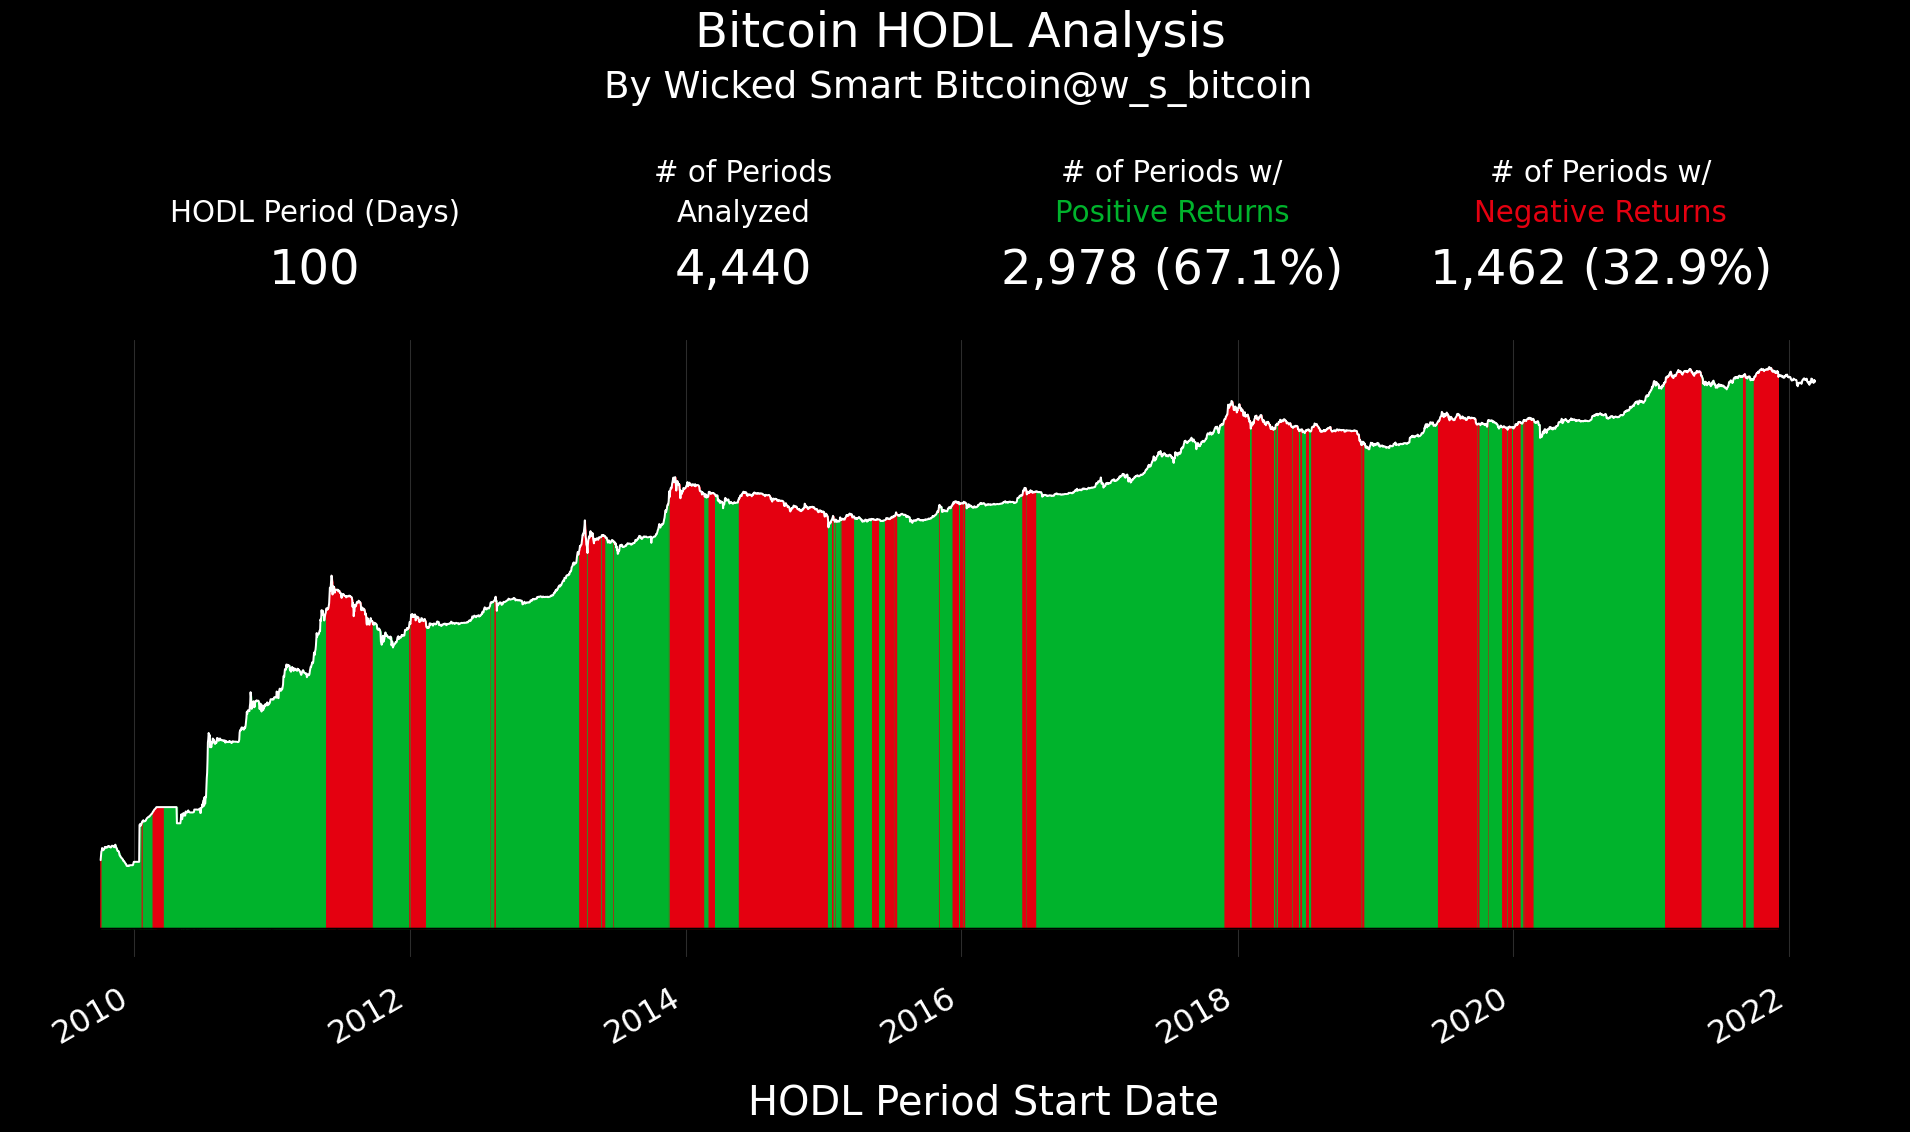

In [58]:
hodl_analysis(hodl_days=100)

<ipython-input-56-18927533350c>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax) = plt.subplots(1, 1, figsize=(size, size_y), dpi=96, facecolor='black')


<Figure size 432x288 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

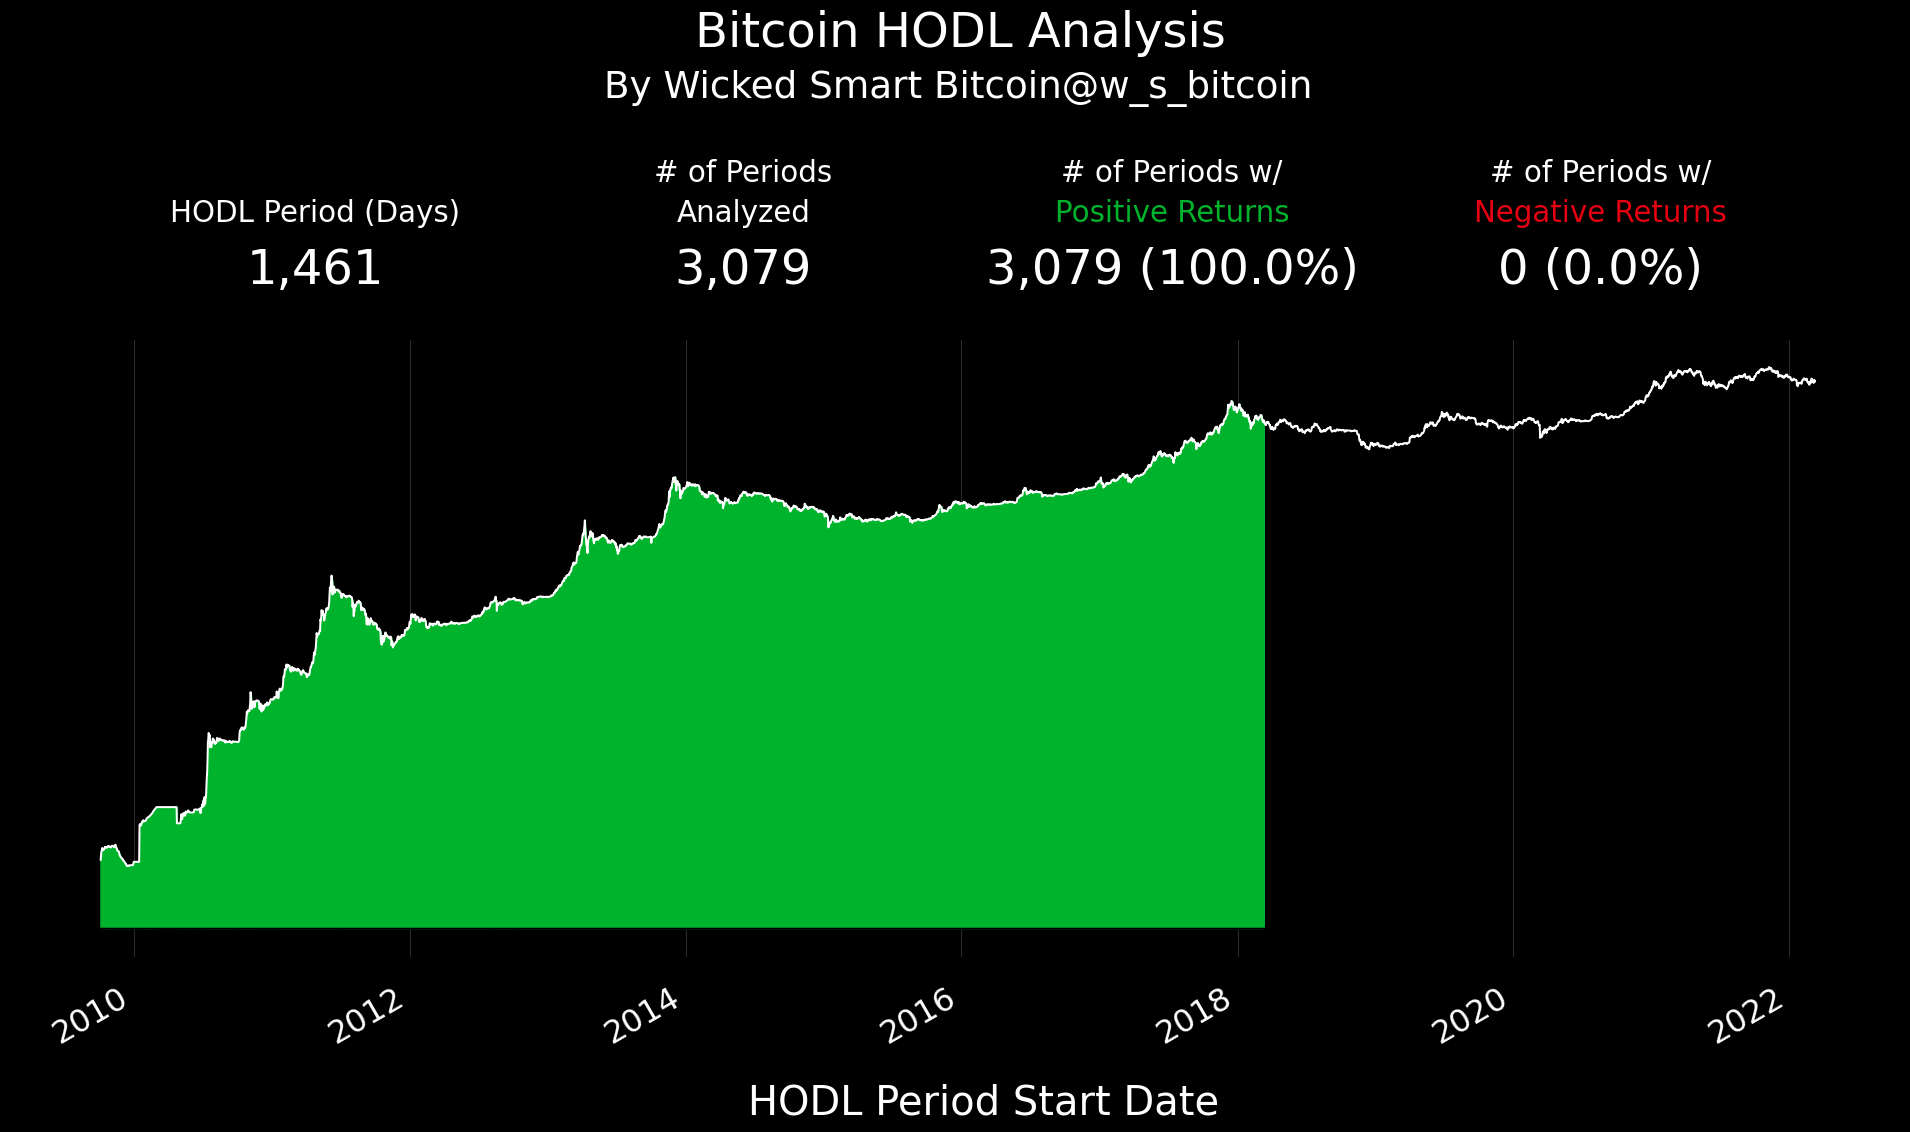

In [59]:
for i in range(1461):
    plt.clf()
    hodl_analysis(hodl_days=i+1)

In [45]:
pos = 0
neg = 0
for i in df['1yr_return'].to_list()[analysis_start_date:analysis_end_date+2]:
    if i > 0:
        pos += 1
    else:
        neg += 1
print(pos/len(df['1yr_return'].to_list()[analysis_start_date:analysis_end_date+2])*100)
print(neg/len(df['1yr_return'].to_list()[analysis_start_date:analysis_end_date+2])*100)

81.94444444444444
18.055555555555554
